In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
import keras

In [3]:
((x_train, y_train), (x_test, y_test)) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

3


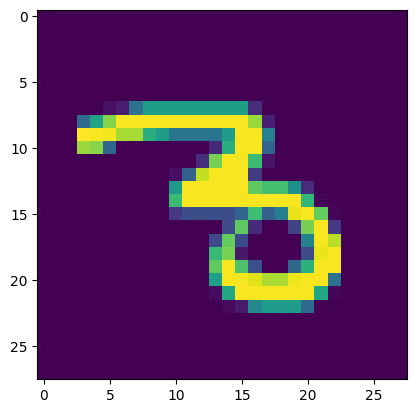

In [7]:
plt.imshow(x_train[30])
print(y_train[30])

In [13]:
x_only_zeros = x_train[y_train == 0]
x_only_zeros.shape

(5923, 28, 28)

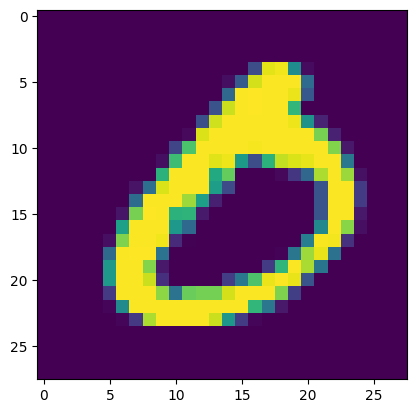

In [17]:
plt.imshow(x_only_zeros[202])


# Pas 1 - Creare unui GAN = generator + discriminator

In [18]:


generator = tf.keras.Sequential([])
discrimintator = tf.keras.Sequential([])


In [19]:
GAN = tf.keras.Sequential([generator, discrimintator])

# Pas 2 -> creare disriminator ca o retea de Discriminative Learning (clasificare -> imagini de calitate vs non-calitate)

In [20]:

discrimintator = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(200, activation='relu'),

    tf.keras.layers.Dense(100, activation='relu'),

    ## OUTPUT -> ESTE BUN SAU NU? -> 1 singur neuron
    tf.keras.layers.Dense(1, activation='sigmoid'),


])
discrimintator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
GAN = tf.keras.Sequential([generator, discrimintator])

# Pas 3 -> Creare generatorului

In [21]:
discrimintator.trainable = False # Discriminatorul nu se antreneaza cu generatorul

In [23]:
generator = tf.keras.Sequential([

        tf.keras.layers.Dense(100, activation='relu'),

        tf.keras.layers.Dense(200, activation='relu'),

        tf.keras.layers.Dense(28 * 28, activation='relu'),

        tf.keras.layers.Reshape((28, 28))
])

In [24]:
GAN = tf.keras.Sequential([generator, discrimintator])

In [25]:
GAN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
GAN.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 1)              │       177,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,201 (692.19 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 177,201 (692.19 KB)

In [27]:
GAN.layers

[<Sequential name=sequential_4, built=False>,
 <Sequential name=sequential_3, built=True>]

In [28]:
x_only_zeros.shape

(5923, 28, 28)

In [29]:
tf.data.Dataset.from_tensor_slices(x_only_zeros)

<_TensorSliceDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>

In [30]:
dataset = tf.data.Dataset.from_tensor_slices(x_only_zeros)
dataset, type(dataset)

(<_TensorSliceDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>,
 tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset)

In [31]:
batch_size = 32

new_batched_data = dataset.batch(batch_size=batch_size, drop_remainder=True).prefetch(1)
new_batched_data

<_PrefetchDataset element_spec=TensorSpec(shape=(32, 28, 28), dtype=tf.uint8, name=None)>

In [32]:
generator

<Sequential name=sequential_4, built=False>

In [33]:
discrimintator

<Sequential name=sequential_3, built=True>

In [34]:
noise = tf.random.normal(shape=(batch_size, 100))
noise

<tf.Tensor: shape=(32, 100), dtype=float32, numpy=
array([[ 0.76039475, -0.48899087, -0.5496989 , ..., -0.6843854 ,
         0.2504052 ,  0.8824144 ],
       [-2.2359643 , -0.6890773 , -1.111726  , ...,  0.54708594,
         0.47576898, -0.08732895],
       [-0.4710662 , -0.94338757,  0.8939393 , ..., -0.11842229,
         0.617753  , -0.30893168],
       ...,
       [-0.15350191,  1.3937008 , -1.3366541 , ..., -0.03619162,
         0.41935566, -0.6752045 ],
       [-0.5867187 ,  0.3543777 ,  0.06700988, ..., -1.6772354 ,
        -0.35971606,  0.65117913],
       [ 0.71366304, -0.21246995,  0.3332117 , ...,  0.16606897,
        -0.6746441 ,  0.3132298 ]], dtype=float32)>

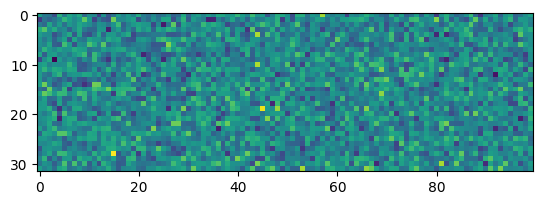

In [35]:
plt.imshow(noise)

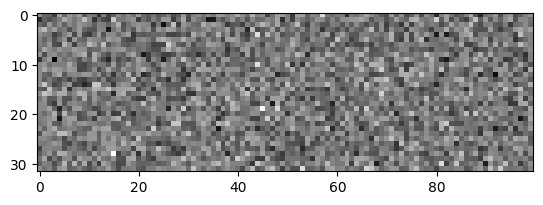

In [36]:
plt.imshow(noise, cmap='gray')

In [39]:
EPOCH = 20

for epoch in range(EPOCH):
    print(f'Sunetem in Epoca: {epoch + 1}')
    for real_batch_of_data in new_batched_data:
        noise = tf.random.normal(shape=(batch_size, 100))
        fake_images = generator(noise)

        # real_batch_of_data - este de tip uint8 si trebuie transformat in float
        float_real_batch_of_data = tf.cast(real_batch_of_data, tf.float32)

        x_fake_and_real = tf.concat([fake_images, float_real_batch_of_data], axis=0)


        ## PAS 1 -  Antreneaza discriminatorul
        discrimintator.trainable = True
                          ## Primile 32(batch_Size) sunt cu categoria 1 (adevarate) si urmatorele 32(batch_Size) cu categoria 0 (False)
        y_discriminator = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)


        discrimintator.train_on_batch(x_fake_and_real, y_discriminator)

        discrimintator.trainable = False

        ## PAS 2 - Antreneaza GAN-ul (aici se antreneaza generatorul dandu-i valori discriminatorului care la randul sau nu mai invata)

        y_GAN = tf.constant([[1.]] * batch_size)

        GAN.train_on_batch(noise, y_GAN)



Sunetem in Epoca: 1
Sunetem in Epoca: 2
Sunetem in Epoca: 3
Sunetem in Epoca: 4
Sunetem in Epoca: 5
Sunetem in Epoca: 6
Sunetem in Epoca: 7
Sunetem in Epoca: 8
Sunetem in Epoca: 9
Sunetem in Epoca: 10
Sunetem in Epoca: 11
Sunetem in Epoca: 12
Sunetem in Epoca: 13
Sunetem in Epoca: 14
Sunetem in Epoca: 15
Sunetem in Epoca: 16
Sunetem in Epoca: 17
Sunetem in Epoca: 18
Sunetem in Epoca: 19
Sunetem in Epoca: 20


In [40]:
noise = tf.random.normal(shape=(batch_size, 100))
noise

<tf.Tensor: shape=(32, 100), dtype=float32, numpy=
array([[-1.3673631 ,  1.0353817 , -0.93633497, ...,  0.18344076,
         0.27666235,  0.3811765 ],
       [-0.7673645 , -0.4386924 ,  0.46754763, ...,  0.2798707 ,
        -1.0841893 ,  0.7246965 ],
       [ 0.06847825, -0.28665072,  0.02560122, ...,  1.4486117 ,
        -0.5831463 , -0.5031216 ],
       ...,
       [-0.3902056 ,  1.6087519 ,  0.9508995 , ...,  2.3353703 ,
         0.00584498,  2.4883785 ],
       [ 0.41676208, -0.3426312 , -0.6412765 , ..., -0.01667205,
        -0.5652647 ,  1.1499767 ],
       [-1.4222106 ,  1.0864388 ,  0.46769318, ...,  0.41160133,
         1.0068523 ,  0.4003461 ]], dtype=float32)>

In [43]:
generated_images = generator(noise)
generated_images.shape

TensorShape([32, 28, 28])

In [44]:
first_generated_image = generated_images[0]
first_generated_image

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

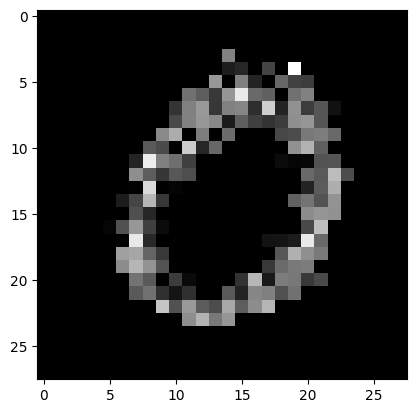

In [45]:
plt.imshow(first_generated_image, cmap='gray')
#

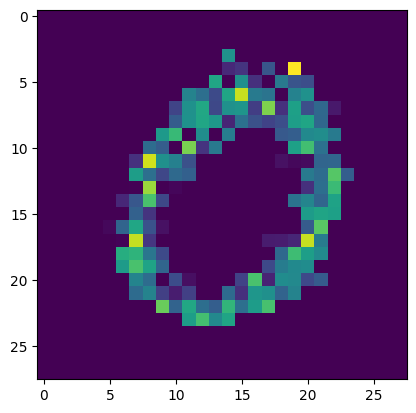

In [46]:
plt.imshow(first_generated_image)

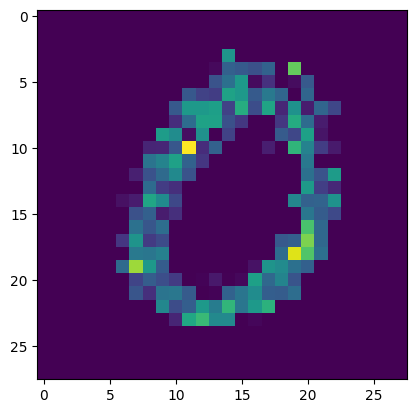

In [47]:
plt.imshow(generated_images[1])

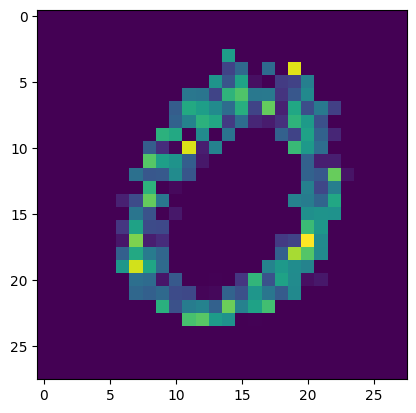

In [48]:
plt.imshow(generated_images[2])

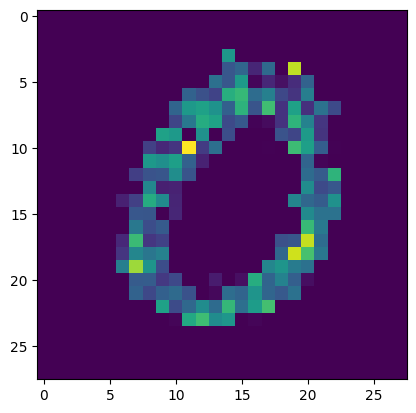

In [49]:
plt.imshow(generated_images[5])